In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import math as mt
from joblib import dump, load

import datetime

import glob
import matplotlib as mpl
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import matplotlib.ticker as ticker
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

from sklearn.model_selection import train_test_split
from random import seed
from random import randint
import statistics
from scipy.stats import stats
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from time import time


In [2]:
# Load X and y values
X = load('Obs_NormX.joblib') 
#X

y= load('Obs_y.joblib')
#y

# Hyperparameter tuning

Accuracy of base Linear Regression model is , 0.7422937423958255


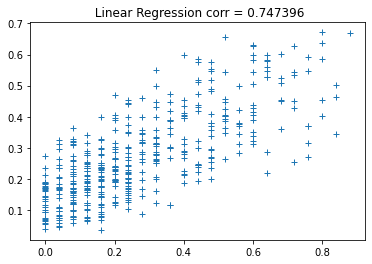

In [3]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.20, random_state=0)
regLin=GradientBoostingRegressor(n_estimators=500, min_samples_leaf=5, max_depth= 3,learning_rate=0.01,random_state=0).fit(X_train, y_train)
acc_svr       = round(regLin.score(X_test, y_test) * 100, 2)
print("Accuracy of base Linear Regression model is ,",(acc_svr/100)**0.5)
yy_test = regLin.predict(X_test)
test_corr = np.corrcoef(yy_test,y_test)[0,1]
plt.title(' Linear Regression corr = %f'%test_corr)
plt.plot(y_test,yy_test,'+')

# test on 2015-2018 Data

In [4]:
# Load X and y values
Xt = load('Obs_NormX_2015-2018.joblib') 
#X

yt= load('Obs_y_2015-2018.joblib')
#y

In [5]:
regLin=GradientBoostingRegressor(n_estimators=500, min_samples_leaf=5, max_depth= 3,learning_rate=0.01,random_state=0).fit(X, y)


Accuracy of base Linear Regression model is , 0.500199960015992


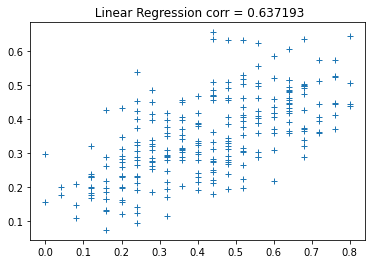

In [6]:
yPred = regLin.predict(Xt)
testcorr = np.corrcoef(yPred,yt)[0,1]
acc_svr       = round(regLin.score(Xt, yt) * 100, 2)
print("Accuracy of base Linear Regression model is ,",(acc_svr/100)**0.5)
plt.title(' Linear Regression corr = %f'%testcorr)
plt.plot(yt,yPred,'+')

# Fog Statistics 

In [7]:
y

<xarray.DataArray 'fogdata' (time: 2170)>
array([0.32, 0.4 , 0.4 , ..., 0.76, 0.72, 0.76])
Coordinates:
  * time     (time) datetime64[ns] 1980-01-01 1980-01-02 ... 2014-12-31

In [26]:
dump(y,'TS1dataObs.joblib')

['TS1dataObs.joblib']

In [8]:
yLR=regLin.predict(X)

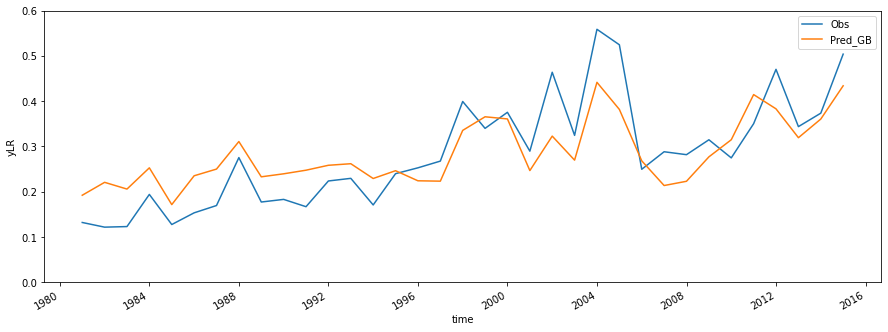

In [25]:
y_predLin_ds=xr.Dataset({'yLR': (('time'), yLR)}, coords={'time': y.time})
dump(y_predLin_ds.yLR,'TS1dataGB.joblib')
plt.figure(figsize=[15,5])
y.resample(time='1Y').mean().plot(label='Obs')
y_predLin_ds.resample(time='1Y').mean().yLR.plot(label='Pred_GB')
plt.ylim(0, 0.6)
plt.legend()

plt.savefig('../obs_yearly_LinearRegression.jpeg',dpi=300)

In [27]:
ynf=y.where(y==0, drop=True)
ynf

yLRnf=y_predLin_ds.where(y_predLin_ds.yLR<0.04,drop=True)

yWd=y.where(y>0.44, drop=True)
yWd

yLRWd=y_predLin_ds.where(y_predLin_ds.yLR>0.44,drop=True)

yint1=y.where(y>0,drop=True)
yintf=yint1.where(yint1<0.48,drop=True)
yintf

yLRint1=y_predLin_ds.where(y_predLin_ds.yLR>0.039,drop=True)
yLRintf=yLRint1.where(yLRint1<0.48,drop=True)

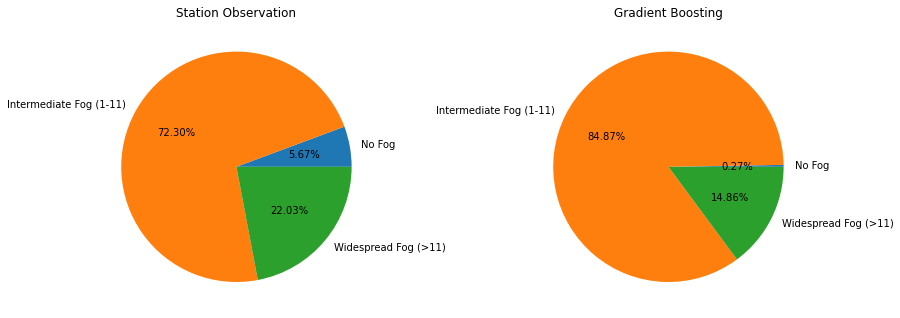

In [28]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
pieLabs = ['No Fog', 'Intermediate Fog (1-11)', 'Widespread Fog (>11)']
piedata = [ynf.shape[0],yintf.shape[0],yWd.shape[0]]
ax.pie(piedata, labels = pieLabs,autopct='%1.2f%%')
ax.set_title('Station Observation')

ax1 = fig.add_axes([1,0,1,1])
ax1.axis('equal')
pieLabs = ['No Fog', 'Intermediate Fog (1-11)', 'Widespread Fog (>11)']
piedata = [yLRnf.yLR.shape[0],yLRintf.yLR.shape[0],yLRWd.yLR.shape[0]]
ax1.pie(piedata, labels = pieLabs,autopct='%1.2f%%')
ax1.set_title('Gradient Boosting')
plt.show()

In [31]:
pie1dataGB= [yLRnf.yLR.shape[0],yLRintf.yLR.shape[0],yLRWd.yLR.shape[0]]
dump(pie1dataGB,'pie1dataGB.joblib')

['pie1dataGB.joblib']

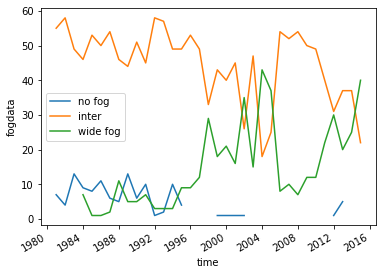

In [30]:
ynf.resample(time='1Y').count().plot(label='no fog')
yintf.resample(time='1Y').count().plot(label='inter')
yWd.resample(time='1Y').count().plot(label='wide fog')
plt.legend()

In [14]:
noFogCounts=np.nan_to_num(ynf.resample(time='1Y').count(), copy=True, nan=0.0, posinf=None, neginf=None)
interFogCounts=yintf.resample(time='1Y').count()
wdFogCounts=yWd.resample(time='1Y').count()


#noFogCountsLR=np.nan_to_num(yLRnf.resample(time='1Y').count(), copy=True, nan=0.0, posinf=None, neginf=None)
noFogCountsLR=0
interFogCountsLR=yLRintf.resample(time='1Y').count()
wdFogCountsLR=np.nan_to_num(yLRWd.yLR.resample(time='1Y').count(), copy=True, nan=0.0, posinf=None, neginf=None)

In [15]:
wdFogCountsLR

array([ 1.,  2.,  7.,  0.,  2.,  3., 12.,  2.,  5.,  6.,  1.,  1.,  2.,
        3.,  3.,  3., 12., 25., 19.,  9., 18.,  7., 32., 20.,  6.,  2.,
        1.,  6.,  7., 26., 26., 16., 17., 32.])

Text(0.5, 1.0, 'Gradient Boosting')

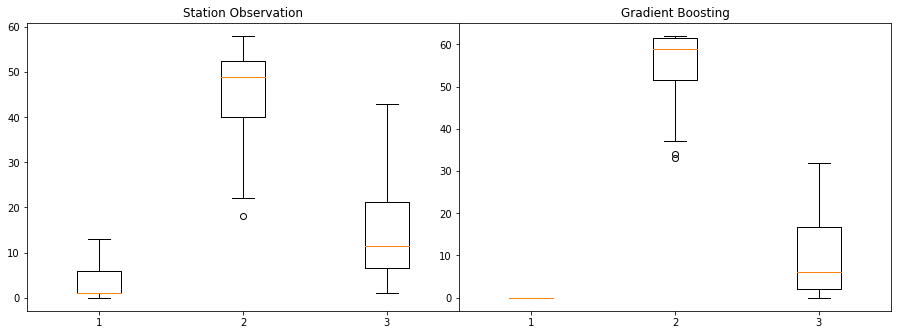

In [16]:
data = [noFogCounts, interFogCounts, wdFogCounts]
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.boxplot(data)
ax.set_title('Station Observation')

dataLR = [noFogCountsLR, interFogCountsLR.yLR, wdFogCountsLR]
ax1 = fig.add_axes([1,0,1,1])
ax1.boxplot(dataLR)
ax1.set_title('Gradient Boosting')

# Test Data 2015-2018

In [17]:
yLRt=regLin.predict(Xt)

In [18]:
dump(yt,'TS2dataObs.joblib')

['TS2dataObs.joblib']

In [19]:
#dump(yLRt,'TS2dataGB.joblib')

['TS2dataGB.joblib']

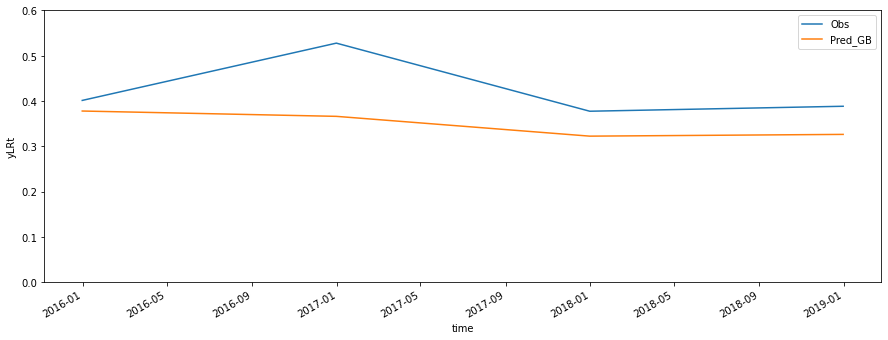

In [24]:
y_predLin_dst=xr.Dataset({'yLRt': (('time'), yLRt)}, coords={'time': yt.time})
dump(y_predLin_dst.yLRt,'TS2dataGB.joblib')
plt.figure(figsize=[15,5])
yt.resample(time='1Y').mean().plot(label='Obs')
y_predLin_dst.resample(time='1Y').mean().yLRt.plot(label='Pred_GB')
plt.ylim(0, 0.6)
plt.legend()

plt.savefig('../obs_yearly_GB_2015-2018.jpeg',dpi=300)

In [35]:
ynft=yt.where(yt==0, drop=True)
ynft

yWdt=yt.where(yt>0.44, drop=True)
yWdt

yint1t=yt.where(yt>0,drop=True)
yintft=yint1t.where(yint1t<0.48,drop=True)
yintft

yLRnft=y_predLin_dst.where(y_predLin_dst.yLRt<0.04,drop=True)

yLRWdt=y_predLin_dst.where(y_predLin_dst.yLRt>0.44,drop=True)
yLRWdt

yLRint1t=y_predLin_dst.where(y_predLin_dst.yLRt>0.039,drop=True)
yLRintft=yLRint1t.where(yLRint1t<0.48,drop=True)
yLRintft

<xarray.Dataset>
Dimensions:  (time: 210)
Coordinates:
  * time     (time) datetime64[ns] 2015-01-02 2015-01-03 ... 2018-12-31
Data variables:
    yLRt     (time) float64 0.2889 0.2834 0.4669 0.3505 ... 0.09282 0.203 0.2885

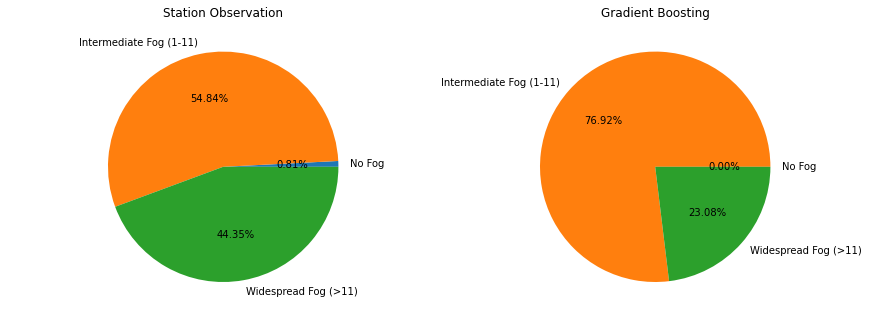

In [36]:


fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
pieLabs = ['No Fog', 'Intermediate Fog (1-11)', 'Widespread Fog (>11)']
piedata = [ynft.shape[0],yintft.shape[0],yWdt.shape[0]]
ax.pie(piedata, labels = pieLabs,autopct='%1.2f%%')
ax.set_title('Station Observation')

ax1 = fig.add_axes([1,0,1,1])
ax1.axis('equal')
pieLabs = ['No Fog', 'Intermediate Fog (1-11)', 'Widespread Fog (>11)']
piedata = [yLRnft.yLRt.shape[0],yLRintft.yLRt.shape[0],yLRWdt.yLRt.shape[0]]
ax1.pie(piedata, labels = pieLabs,autopct='%1.2f%%')
ax1.set_title('Gradient Boosting')
plt.show()




In [37]:
pie1dataGB= [yLRnft.yLRt.shape[0],yLRintft.yLRt.shape[0],yLRWdt.yLRt.shape[0]]
dump(pie1dataGB,'pie2dataGB.joblib')

['pie2dataGB.joblib']